## Here're our sample
- https://github.com/TrinhDinhPhuc/ML-Learner/blob/master/Capture.PNG

## Fristly, we need 2 libraries Numpy for linear regression and Matplotlib for plotting


In [2]:
from __future__ import division,print_function,unicode_literals
import numpy as np
import matplotlib.pyplot as plt


## Secondly, we declare and perfom data on diagram


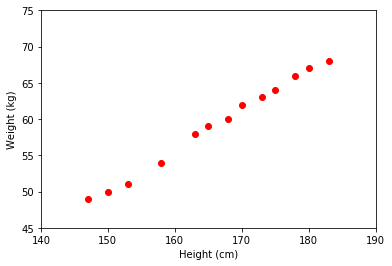

In [3]:
#height
X = np.array([[147,150,153,158,163,165,168,170,173,175,178,180,183]]).T
# weight
Y = np.array([[49,50,51,54,58,59,60,62,63,64,66,67,68]]).T
# visualize data
plt.plot(X,Y,'ro')
plt.axis([140,190,45,75])
plt.xlabel('Height (cm)')
plt.ylabel("Weight (kg)")
plt.show()




#### Let's look at the diagram, we can see data order by nearly a straight line
#### So Linear Regression model might have give a good result
### (Weight) = W_1*(Height) + W_0

----------------------------------------------
Tiếp theo, chúng ta sẽ tính toán các hệ số w_1 và w_0 dựa vào công thức (5). Chú ý: giả nghịch đảo của một ma trận A trong Python sẽ được tính bằng<strong>  numpy.linalg.pinv(A)  </strong>, pinv là từ viết tắt của pseudo inverse.


w =  [[-33.73541021]
 [  0.55920496]]


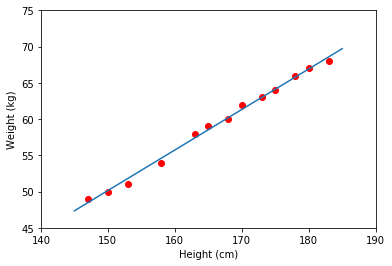

In [5]:
# Building Xbar
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

# Calculating weights of the fitting line
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, Y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)
# Preparing the fitting line
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(145, 185, 2)
y0 = w_0 + w_1*x0

# Drawing the fitting line
plt.plot(X.T, Y.T, 'ro')     # data
plt.plot(x0, y0)               # the fitting line
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

#### Từ đồ thị bên trên ta thấy rằng các điểm dữ liệu màu đỏ nằm khá gần đường thẳng dự đoán màu xanh. Vậy mô hình Linear Regression hoạt động tốt với tập dữ liệu training. Bây giờ, chúng ta sử dụng mô hình này để dự đoán cân nặng của hai người có chiều cao 155 và 160 cm mà chúng ta đã không dùng khi tính toán nghiệm.



In [6]:
y1 = w_1*155 + w_0
y2 = w_1*160 + w_0

print( u'Predict weight of person with height 155 cm: %.2f (kg), real number: 52 (kg)'  %(y1) )
print( u'Predict weight of person with height 160 cm: %.2f (kg), real number: 56 (kg)'  %(y2) )

Predict weight of person with height 155 cm: 52.94 (kg), real number: 52 (kg)
Predict weight of person with height 160 cm: 55.74 (kg), real number: 56 (kg)


### Chúng ta thấy rằng kết quả dự đoán khá gần với số liệu thực tế.




## Nghiệm theo thư viện scikit-learn
#### Tiếp theo, chúng ta sẽ sử dụng thư viện scikit-learn của Python để tìm nghiệm.



In [8]:
from sklearn import datasets, linear_model

# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
regr.fit(Xbar, Y)

# Compare two results
print( 'Solution found by scikit-learn  : ', regr.coef_ )
print( 'Solution found by (5): ', w.T)

Solution found by scikit-learn  :  [[-33.73541021   0.55920496]]
Solution found by (5):  [[-33.73541021   0.55920496]]


##### Chúng ta thấy rằng hai kết quả thu được như nhau! (Nghĩa là tôi đã không mắc lỗi nào trong cách tìm nghiệm ở phần trên)


## Linear Regression rất nhạy cảm với nhiễu, ví dụ ta thêm 1 cặp dữ liệu (150cm,90kg)

w =  [[ 22.21867545]
 [  0.23775985]]


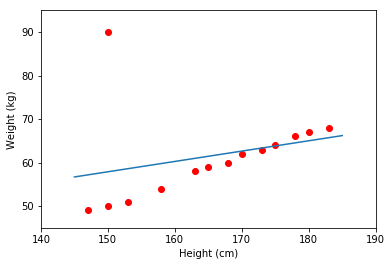

In [12]:
import numpy as np 
import matplotlib.pyplot as plt

# height (cm)
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183, 150]]).T
# weight (kg)
y = np.array([[ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68, 90]]).T

# Building Xbar 
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

# Calculating weights of the fitting line 
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print ('w = ', w)
# Preparing the fitting line 
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(145, 185, 2, endpoint=True)
y0 = w_0 + w_1*x0

# Drawing the fitting line 
plt.plot(X, y, 'ro')     # data 
plt.plot(x0, y0)               # the fitting line
plt.axis([140, 190, 45, 95])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()